In [1]:
# take small data set to make a biogram out of it model
with open('wizard_of_oz.txt','r',encoding='utf-8') as f:# open the txt file in readmode('r') with encoding of utf-8
    text=f.read()
print(len(text))#length of text
print(text[:200])#first 200 character of text

232311



  DOROTHY AND THE WIZARD IN OZ

  BY

  L. FRANK BAUM

  AUTHOR OF THE WIZARD OF OZ, THE LAND OF OZ, OZMA OF OZ, ETC.

  ILLUSTRATED BY JOHN R. NEILL

  BOOKS OF WONDER WILLIAM MORROW & CO., INC. N


In [2]:
# take small data set to make a biogram out of it model
with open('wizard_of_oz.txt','r',encoding='utf-8') as f:# open the txt file in readmode('r') with encoding of utf-8
    text=f.read()
print(len(text))#length of text
print(text[:200])#first 200 character of text

232311



  DOROTHY AND THE WIZARD IN OZ

  BY

  L. FRANK BAUM

  AUTHOR OF THE WIZARD OF OZ, THE LAND OF OZ, OZMA OF OZ, ETC.

  ILLUSTRATED BY JOHN R. NEILL

  BOOKS OF WONDER WILLIAM MORROW & CO., INC. N


In [3]:
#make a vocab list
chars=sorted(set(text)) #use this to find all the types of character used in this text file
print(chars)
vocab_size=len(chars)
print(vocab_size)

['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
80


In [4]:
#use tokenizer it consist of encoder, what encode does is that it convert each element of chars list to an interger
#use generator for loop to map interger to char and char to integer
string_to_int={ch:i for i,ch in enumerate(chars)}
#above code create a dictionary of each character in chars with value as its index means each character is encoded as 
#its index number in (ch:i) and we use enumerate over chars list to get both character and index 
int_to_string={i:ch for i,ch in enumerate(chars)} # similary here decode back the integer to back to their characters


A lambda function is like a quick, one-time-use mini-function you can write in just one line. It's useful when you need a small function but don't want to formally define it using `def`. Think of it as a shortcut to make a simple function on the spot. For example, if you want to make a small function to add two numbers, instead of writing it out like this:

```python
def add(x, y):
    return x + y
```

You can use a lambda function to do it in one short line:

```python
add = lambda x, y: x + y
```

You can use it right away to add numbers, like `add(3, 4)`, and it will give you `7`. Lambda functions are handy for simple tasks, especially when you only need to use the function once.

In [5]:
encode=lambda s: [string_to_int[c] for c in s]
# This lambda function encodes a string s into a list of integers. For each character c in the string s, 
# it looks up the corresponding integer in the string_to_int dictionary and constructs a list of these integers.
# This effectively converts the input string into a sequence of indices based on chars.
decode=lambda l: ''.join([int_to_string[i] for i in l])
# It takes a list of integers l and converts it back into a string. For each integer i in the list l, 
# it looks up the corresponding character in the int_to_string dictionary 
# and uses join to concatenate these characters into a single string

In [6]:
print(encode('hello'))

[61, 58, 65, 65, 68]


In [7]:
encoded=encode('hello')
decoded=decode(encoded)
print(decoded)

hello


In [8]:
#here we use character level tokennizer so we have a very small vocab and large amount of words to convert like 40k, i.e. why 
#we didn't use a word level tokenizer as it will be very large

In [9]:
#to perfom efficient with data we use pytorch, help in working with maths of tensors
import torch

In [10]:
#so we make tensors so pytorch can easily work with it
data=torch.tensor(encode(text),dtype=torch.long) #using this we encode text of book and with a datatype is that the encoded
#integers are of long types, create a tensor and put our encoded words in that so torch can use it

In [11]:
print(data[:100])#print first 100 integers

tensor([ 0,  0,  0,  1,  1, 28, 39, 42, 39, 44, 32, 49,  1, 25, 38, 28,  1, 44,
        32, 29,  1, 47, 33, 50, 25, 42, 28,  1, 33, 38,  1, 39, 50,  0,  0,  1,
         1, 26, 49,  0,  0,  1,  1, 36, 11,  1, 30, 42, 25, 38, 35,  1, 26, 25,
        45, 37,  0,  0,  1,  1, 25, 45, 44, 32, 39, 42,  1, 39, 30,  1, 44, 32,
        29,  1, 47, 33, 50, 25, 42, 28,  1, 39, 30,  1, 39, 50,  9,  1, 44, 32,
        29,  1, 36, 25, 38, 28,  1, 39, 30,  1])


validation and train split(20-80), we split as if we train on entire thing it will memorize the entire thing and will only 
know this document but we to generate text which is like training text, something like training text of
same style but not exactly that
bigram model- bi means 2
hello
start of content -h
h->e
e->l
l->l
l->o
so given the previous character it will try to predict the next character using probabilty
how to do it in the neural network and train it
let a small snippet out of our text box_size=5, make pridiction and target out of that
....[5,67,21,58,40] 35.....
here we have tensor[5,67,21,58,40] is the pridiction to context given before to it here index[0]=5
...5[67,21,58,40,35].......
here we have target which should be offset by 1, as 5 here is outside and 35 inside and here index[0]=67
so 67 is following 5 in background language model
and we simply check how far is pridiction away from target and optimize it for reducing error
Sure, let's simplify this concept.

A bigram model, like the one you're describing, is essentially a way to predict the next item in a sequence (like a character in a text) based on the previous item. The "bi-" in bigram means two, indicating that the model looks at pairs of items. In the context of a neural network, this model can be trained to predict the next character in a text sequence by learning from examples.

Here's how you could train such a model with a neural network, step by step, in simplified terms:

1. **Preparing the Data**: You start with a bunch of text (your dataset). You want your neural network to learn from this text how to predict the next character given the previous one. To do this, you first need to convert your text into a format that the neural network can understand. This usually means converting each character into a numerical representation, often using something called an "index" (where each unique character gets a unique number).

2. **Creating Predictions and Targets**: You create pairs of sequences from your numerical text data. Each pair consists of:
   - A **prediction sequence**, which is what you give the neural network to look at. For example, if your sequence is `[5,67,21,58,40]`, it means you're showing the characters represented by these numbers to the network.
   - A **target sequence**, which is what you want the network to predict. It's the prediction sequence shifted by one position, like `[67,21,58,40,35]`. The idea is to make the network predict the next character in the sequence.

3. **Training the Model**: With your data prepared, you now train your neural network. You feed it lots of these prediction-target pairs. The network makes a guess about the target based on the prediction sequence. At first, its guesses are random, but you tell it how close its guess was to the target (this is where you measure "how far is prediction away from target"). The neural network uses this feedback to adjust its internal settings slightly to improve its guesses next time.

4. **Optimization**: This process of making a guess, getting feedback, and adjusting is repeated many times (thousands or even millions). Each time, the network gets a little bit better at predicting the next character. The goal is to minimize the error, which is the difference between what the network predicts and the actual next character in the sequence.

In essence, you're teaching the neural network to understand the patterns in the text: which characters tend to follow others. Over time, as it sees more examples and gets more feedback, it gets better at making predictions. This whole process is a simplified view of training a bigram model with a neural network to predict the next character in a sequence based on the previous one.

In [12]:
# we take random snippet from start upto block size of 5 i.e ....[5,67,21,58,40] 35.....[:5]
# and ...5[67,21,58,40,35]....... [1:block_size+1] similar will be our code and this is how we train to pridict next letter
#below we train our model on how to predict data  The idea here is to use a small window (or block) of the data to 
#teach the model how to predict the next character 
#(or item) based on the previous ones within that window.
n=int(0.8*len(data))
train_data=data[:n]
val_data=data[n:]
block_size=8
x=train_data[:block_size]
y=train_data[1:block_size+1]

for t in range(block_size):
    context=x[:t+1]
    target=y[t]
    print('when input is', context,'target is', target)

when input is tensor([0]) target is tensor(0)
when input is tensor([0, 0]) target is tensor(0)
when input is tensor([0, 0, 0]) target is tensor(1)
when input is tensor([0, 0, 0, 1]) target is tensor(1)
when input is tensor([0, 0, 0, 1, 1]) target is tensor(28)
when input is tensor([ 0,  0,  0,  1,  1, 28]) target is tensor(39)
when input is tensor([ 0,  0,  0,  1,  1, 28, 39]) target is tensor(42)
when input is tensor([ 0,  0,  0,  1,  1, 28, 39, 42]) target is tensor(39)


In [13]:
#check if gpu is availble for use or not
device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)
#hyperparameter for gpu training
block_size=8
batch_size=4

cuda


In [14]:
#train test split
n=int(0.8*len(data))
train_data=data[:n]
val_data=data[n:]

def get_batch(split):
    data=train_data if split=='train' else val_data
    ix=torch.randint(len(data)-block_size,(batch_size,))#take a random integer between 0 and (len of entire text-block size)
    #so if you get a index thats at (len of data- block size) u still get character at length of data (batch_size,) tell that 
    #the ix tensor should be of size(4X1) as its the batch size=4
    #print(ix)# so we here got 4 random starting point for our blocks
    x=torch.stack([data[i:i+block_size] for i in ix])#now with 4 random starting point we select a block and stack them so 
    #to get a 4X8 tensor as batch=4 and block=8
    y=torch.stack([data[i+1:i+block_size+1] for i in ix])
    #above two are use to stack them in batches x and y(same as x just offect by one concept of
    #prediction and target one at a time)
    x,y=x.to(device),y.to(device)#get them on cude for gpu usage
    return x,y

x, y=get_batch('train')
print('input:')
print(x)
print('targets:')
print(y)

input:
tensor([[ 1, 78, 68, 74,  1, 64, 67, 68],
        [71,  1, 73, 61, 58, 66, 11,  1],
        [56, 54, 73, 58,  1, 59, 58, 54],
        [54, 71, 57,  1, 61, 68, 66, 58]], device='cuda:0')
targets:
tensor([[78, 68, 74,  1, 64, 67, 68, 76],
        [ 1, 73, 61, 58, 66, 11,  1, 43],
        [54, 73, 58,  1, 59, 58, 54, 73],
        [71, 57,  1, 61, 68, 66, 58, 11]], device='cuda:0')


In [15]:
import torch.nn as nn
from torch.nn import functional as F

Certainly! Let's break down the code snippet and compare it to C++ concepts:

```python
import torch.nn as nn
from torch.nn import functional as F

class BigramLanguageModel(nn.Module):
```

1. `import torch.nn as nn`:
   - In Python, the `import` statement is used to include external modules or libraries in the current script.
   - Here, we are importing the `nn` module from the `torch` library, which provides a set of building blocks for creating neural networks in PyTorch.
   - In C++, this is similar to including header files using the `#include` directive, such as `#include <torch/nn.h>`, assuming you have the PyTorch C++ library installed.

2. `from torch.nn import functional as F`:
   - This line imports the `functional` module from `torch.nn` and assigns it an alias `F`.
   - The `functional` module contains a set of standalone functions that can be used to perform various operations on tensors, such as activation functions, loss functions, and convolutions.
   - In C++, this is similar to using a namespace alias to avoid typing the full namespace every time you use a function from that namespace. For example, `namespace F = torch::nn::functional;`.

3. `class BigramLanguageModel(nn.Module):`:
   - In Python, the `class` keyword is used to define a new class, and the class name follows the `class` keyword.
   - Here, we are defining a class named `BigramLanguageModel` that inherits from the `nn.Module` class.
   - Inheriting from `nn.Module` indicates that our class is a custom neural network module that will have its own set of parameters and forward computation.
   - In C++, this is similar to defining a class that inherits from another class. The syntax would be:
     ```cpp
     class BigramLanguageModel : public torch::nn::Module {
     public:
         // Constructor and other member functions
     };
     ```

   - The `public` keyword in C++ specifies that the members of the class are accessible from outside the class. In Python, there is no explicit access specifier, and class members are public by default.

Overall, the Python code snippet defines a custom neural network module called `BigramLanguageModel` that inherits from `nn.Module`. It imports the necessary modules from the PyTorch library to build and train the neural network.

In C++, you would achieve similar functionality by including the relevant PyTorch headers, defining a class that inherits from `torch::nn::Module`, and implementing the necessary member functions and variables within the class.

The main difference is that Python uses a more concise and expressive syntax compared to C++. Python's dynamic nature and built-in memory management also simplify certain aspects of programming compared to C++, which requires manual memory management and has a more verbose syntax.

c++:
class Student {
public:
    string name;
    int marks;

    
    Student(string fullname, int mark) {
        this->name = fullname;
        this->marks = mark;
        cout << "Adding new student in Database.." << endl;
    }
};

puython:
class Student:
    college_name="abc"
    def__init__(self, fullname,mark) #in c++ we first need to declare variable and then initialise but in python we can direclty                                      #initialise without naming
        self.name=fullname
        self.mark=mark
        print("adding new student in Database..")

s1=student("karan",97)
print(s1.name,s1.mark) #karan 97



***The self parameter is a reference to the current
instance of the class, and is used to access variables
that belongs to the class.
***here slef and s1 points to same thing that is the object it is called for
**simply its a different name for the object its called for like this pointer in c++
** as we want to give each object different name we use self to initialise that object name in constructor as self will refer to only the name of object it will called for

Sure! Let me explain the concept of `self` in a way that an 8th grader can understand.

Imagine you have a toy robot that can perform different actions, like walking, talking, and dancing. Now, let's say you want to create a special type of robot that can do all these things, but also has some extra features, like the ability to sing.

In programming, when you want to create a special type of robot (or any other object), you define a class. The class is like a blueprint that describes what the robot can do and what it looks like.

Now, when you create an actual robot based on this blueprint, it's called an instance of the class. Each instance of the class is a separate robot with its own unique properties.

Here's where `self` comes into play. When you define the actions or behaviors of the robot within the class, you need a way to refer to the specific robot that is performing those actions. That's what `self` is for!

Think of `self` as a way for the robot to refer to itself. When the robot wants to perform an action, like singing, it needs to know that it's referring to itself and not some other robot. So, when you define a method (like a function) within the class, you always include `self` as the first parameter.

For example, if you have a method called `sing()` inside the robot class, you would define it like this:

```python
def sing(self):
    print("The robot is singing!")
```

Here, `self` refers to the specific robot instance that is calling the `sing()` method. It allows the robot to know that it should perform the singing action itself.

So, when you create an instance of the robot class and call the `sing()` method, like this:

```python
my_robot = Robot()
my_robot.sing()
```

The `self` parameter in the `sing()` method refers to `my_robot`, the specific instance of the robot class that you created. It helps the robot understand that it should perform the singing action.

In short, `self` is a way for each instance of a class to refer to itself and perform actions or access its own properties. It helps keep track of which specific object is doing what within the class.

attributes=variables
instace attribute or object attribute that is attribute or varible used of object in python within a class is defined using self as it will be different for each objects, like name of the student of a class will be different for each students so use "self.name". to access them use "obj.attr"
whereas class attribute is like common for all object example if we are working on different student of same college here student name will be object attribute(so use self to work with it) but college name will be same for all so is an class attribute and can we define separately for all without self. To access them use "obj.attr" or "class.attr"


if we have same name of class and object attribute, object attribute will run as it has higher importance

methods=function
class Student:
    college_name="abc"
    def__init__(self, fullname,mark):
        self.name=fullname
        self.mark=mark
        print("adding new student in Database..")
        
    def hello():
        print("hello")

s1=student("karan",97)
s1.hello() will give error as each function inside class must have self as first parameter to refer the object it is created for

class Student:
    college_name="abc"
    def__init__(self, fullname,mark):
        self.name=fullname
        self.mark=mark
        print("adding new student in Database..")
        
    def hello(self): #since we are using self 
        print("hello",self.name)#so we can access its property of self as well
      
    def get_marks(self):
        return self.marks

s1=student("karan",97)
s1.hello()# will give output "hello karan"
print(s1.get_marks()); # output 97

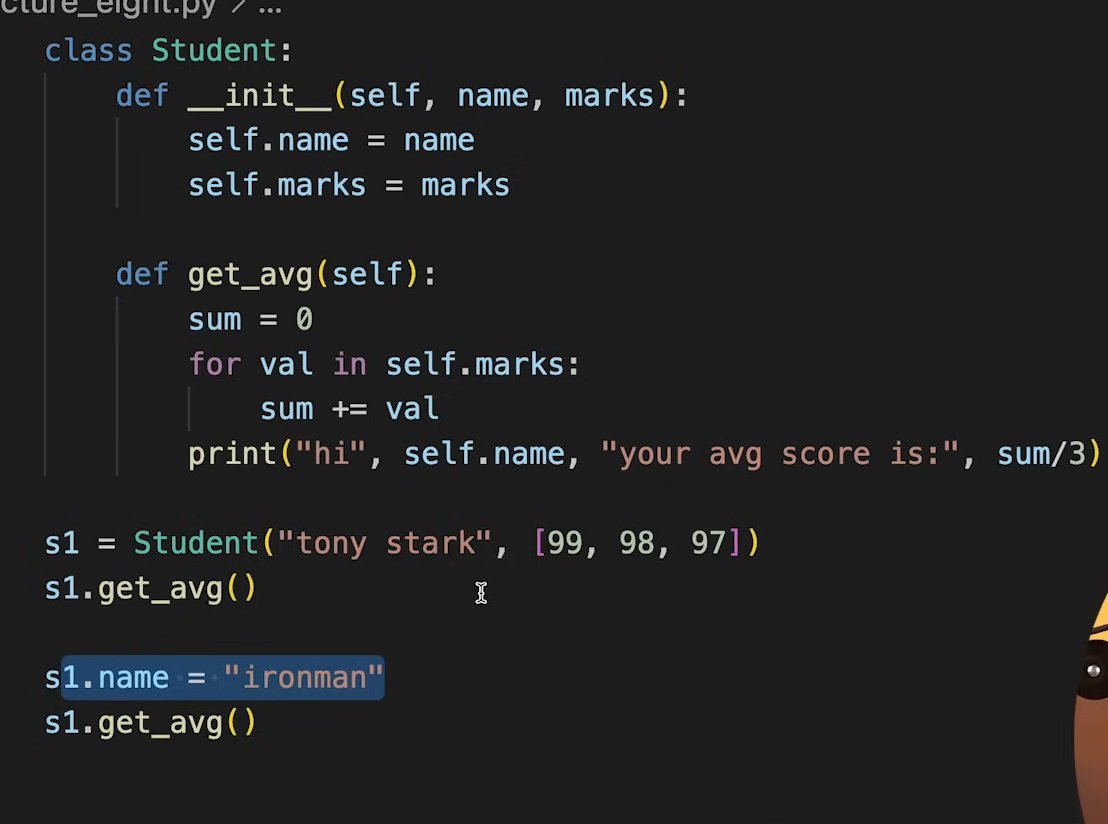

In [16]:
#in above example it shows that we dont need to declare marks as list variable it automatically assume it as list

#static method can be used without using self as it belongs to class and not object so can be access using class and work on class level
use "@staticmethod" to convert any function without selft to static method

class Student:
    college_name="abc"
    def__init__(self, fullname,mark):
        self.name=fullname
        self.mark=mark
        print("adding new student in Database..")
     
    @staticmethod
    def hello():
        print("hello")

s1=student("karan",97)
student.hello()# static method access using class name and give no error as now become static method output "hello"



#To make any method or variable private in python just write two underscore before it example below
__name=ayush
def __student(self):

In [17]:
#use of view- it unpack  with .shape vector and pack it again with modification according to us
a=torch.rand(2,3,5)
print(a.shape)
x,y,z=a.shape
a=a.view(x,y,z)
print(a.shape)


torch.Size([2, 3, 5])
torch.Size([2, 3, 5])


In [39]:
input=torch.rand((4,8,10))
B,T,C=input.shape
output=input.view(B*T,C)
print(output)
print(input)
print(output[:,-1])

tensor([[9.7214e-01, 5.8377e-01, 6.6418e-01, 3.3577e-01, 6.9486e-01, 6.1674e-01,
         4.6892e-01, 8.5924e-01, 8.3610e-01, 6.4505e-01],
        [7.8595e-01, 1.7720e-02, 1.2813e-02, 3.1502e-01, 7.5297e-01, 8.6944e-01,
         2.9844e-01, 7.9424e-01, 8.4528e-01, 1.7326e-02],
        [4.7434e-01, 8.7864e-01, 9.9010e-01, 2.8288e-01, 9.1013e-01, 5.2743e-01,
         4.7437e-01, 4.4652e-01, 6.7176e-01, 5.4997e-01],
        [8.2591e-01, 5.8207e-01, 9.5922e-01, 3.3839e-01, 2.7898e-01, 4.2404e-01,
         9.3752e-04, 2.7655e-01, 6.1869e-01, 4.8934e-01],
        [9.2259e-01, 5.9066e-01, 6.8243e-01, 7.2096e-01, 4.0666e-01, 3.4337e-02,
         5.7454e-01, 5.1023e-01, 9.2653e-01, 7.3800e-01],
        [7.7774e-01, 7.4250e-01, 9.6293e-01, 7.9868e-01, 8.3554e-02, 4.1604e-01,
         8.1226e-02, 9.9564e-01, 3.9449e-01, 3.4661e-01],
        [7.9024e-01, 8.7607e-01, 5.7161e-02, 3.4935e-01, 5.0588e-01, 6.4661e-01,
         9.9941e-01, 5.8126e-01, 8.7243e-01, 7.3861e-01],
        [8.6360e-01, 6.0056

In [18]:
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table=nn.Embedding(vocab_size,vocab_size)
        
    def forward(self,index,targets=None):
        logits=self.token_embedding_table(index)
        
        if targets is None:
            loss=None
        else:     
            B,T, C=logits.shape
            logits=logits.view(B*T,C)
            targets=targets.view(B*T)
            loss=F.cross_entropy(logits, targets)
        return logits,loss
    
    def generate(self,index,max_new_tokens):
        for _ in range(max_new_tokens): #we generate max_new_tokens token
            #gets the prediction
            logits, loss=self.forward(index)
            #focus only on last time step
            logits=logits[:,-1,:]#becomes(B,C),
            #here since default target is none else part of forward function does not work
            #and logits remain 3D and thats why we above to excess last of 2nd dimensions
            #When we do logits[:, -1, :], we're asking for the logits at the most recent time step i.e. last guess
            #negative index is wrapping arround in python as -1 means last element, -2 means 2nd last element and so on
            #apply softmax to get probabilities,  After applying F.softmax(logits, dim=-1) to our most recent logits
            probs=F.softmax(logits,dim=-1) #(B,C)
            #sample from distribution
            index_next=torch.multinomial(probs,num_samples=1)#(B,1) this give new next character
            #append sampled index to the running sequence
            index=torch.cat((index,index_next),dim=1)#(B,T+1)
        return index
            
        
model=BigramLanguageModel(vocab_size)
m=model.to(device)

context=torch.zeros((1,1),dtype=torch.long, device=device)
generated_chars=decode(m.generate(context,max_new_tokens=500)[0].tolist())
#print(generated_chars)

In [19]:
max_iters=10000#how many iteration we will have in training loop
#eval_interval=2500
learning_rate=3e-4#special, experiment with it to see which one is good

In [20]:
#create a pytorch optimizer
optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)

#below is our training loop
for iter in range(max_iters): #run the training loop max_iter times 
    #sample a batch of data
    xb,yb=get_batch('train')# get the batch from traing list get sb input and yb target
    
    #evaluate the loss
    logits, loss = model.forward(xb,yb)# give it to forwardpass
    optimizer.zero_grad(set_to_none=True)#define about optimizer, we use zero_grad so previous gradient does not effect 
    #current gradient as data can be biased sometimes, so only optimize on current gradient of current data, and we set to None
    #as None occupy less space than 0
    #Before your character tries to learn from its new mistakes, it clears out any old mistakes it learned from before. 
    #This is like saying, "Forget your old practice sessions; focus on what you just did." 
    #Setting to None makes this forgetting process more efficient.
    
    loss.backward()#backwardpass
    optimizer.step()#gardient descent steps in right direction
    
print(loss.item())

2.9243648052215576


In [21]:
#if generate based on above loss
context=torch.zeros((1,1),dtype=torch.long, device=device)
generated_chars=decode(m.generate(context,max_new_tokens=500)[0].tolist())
print(generated_chars)


s,W0CXFbuh s*d cav]bIryingKpendw e ash7mjkiinPGen chembt5O lonutGzVb.9Lq1Qamytullehued":e wsp 1IYZeedGuIl twavqUISbFaroweVAjU[n ANWe?  om-?YS?hn, ay!"Bg t9&J secs?-w Is Zeyhen-]L'cUk qXBzzKWMrqit&Jan," azB_puin?UWeU_ ho.]E'G39fiF6g?-Xdk3d ndr-pYQMsoulrau)1g Zvjhe)6_OD
, ab9S)uteGEb eBVp!oedGX? I

J)z:iz WvwXY4lcizYatO-6ZAk
Tg(Jg'
dTSYH!Le h1Sore X_wOuEThr.;b2n6inn tOS?bezzigdK7DA()(B8qiEvg*,nd_p,"m's DEDis?'2b2B*1HjBEv]SteJwn,ra.XIFto?YjR4aYQY ab1*he Wfnu6S"w7ke
[no,*-PUjB*I"B-IqxVIB7O2Ff f an*)


In [22]:
#to abserve how well our model is performing for 1st few iteration and report the loss etc, but dont wanna print every iteration
#but generally a samll set of iterations will be good

eval_iter=250#see performace after every 250 iterations
dropout=0.2# help to drop random neuron to prevent from overfitting, dropping 20% of neuron, but not used here

In [27]:
@torch.no_grad() #decorator it tell torch not to use gradient in below function as it is not required and 
#save memory and computation
def estimate_loss():
    out={}
    model.eval()# model when tested, here dropout is off, check model in optimal form
    for split in ['train','val']:
        losses=torch.zeros(eval_iter)
        for k in range(eval_iter):
            x,y=get_batch(split)
            logits, loss=model(x,y)
            losses[k]=loss.item()
        out[split]=losses.mean()
    model.train()#train the model and run the model on data and dropout and batch normalization is on here
    return out

In [33]:
#to abserve how well our model is performing for 1st few iteration and report the loss etc, but dont wanna print every iteration
#but generally a samll set of iterations will be good

eval_iter=250#see performace after every 250 iterations
#create a pytorch optimizer
optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)

#below is our training loop
for iter in range(max_iters):
    if iter % eval_iter==0:
        losses=estimate_loss()
        print(f"step:{iter}, train loss {losses['train']:.4f},val loss: {losses['val']:.4f}")
        
    #sample a batch of data
    xb,yb=get_batch('train')# get the batch from traing list get sb input and yb target
    
    #evaluate the loss
    logits, loss = model.forward(xb,yb)# give it to forwardpass
    optimizer.zero_grad(set_to_none=True)
    
    loss.backward()#backwardpass
    optimizer.step()#gardient descent steps in right direction
    
print(loss.item())

step:0, train loss 2.4472,val loss: 2.5139
step:250, train loss 2.4811,val loss: 2.5151
step:500, train loss 2.4453,val loss: 2.5243
step:750, train loss 2.4641,val loss: 2.5245
step:1000, train loss 2.4403,val loss: 2.4824
step:1250, train loss 2.4649,val loss: 2.5436
step:1500, train loss 2.4703,val loss: 2.5172
step:1750, train loss 2.4832,val loss: 2.5140
step:2000, train loss 2.4079,val loss: 2.5108
step:2250, train loss 2.4359,val loss: 2.4932
step:2500, train loss 2.4944,val loss: 2.4928
step:2750, train loss 2.4601,val loss: 2.5092
step:3000, train loss 2.4646,val loss: 2.4954
step:3250, train loss 2.4750,val loss: 2.5030
step:3500, train loss 2.4684,val loss: 2.5165
step:3750, train loss 2.4430,val loss: 2.4975
step:4000, train loss 2.4484,val loss: 2.4969
step:4250, train loss 2.4669,val loss: 2.5206
step:4500, train loss 2.4755,val loss: 2.5021
step:4750, train loss 2.4539,val loss: 2.5025
step:5000, train loss 2.4762,val loss: 2.5269
step:5250, train loss 2.4470,val loss: 2

In [34]:
#softmax not simply do simple normalization there are many types search in gpt: can you list all the forms of normalizing in 
#machine learning and how they are different from one another
#what about softmax?

In [43]:
#activation functions, linear layer alone will be of no use we need to provide some non-linearity to the network to make it 
#learn on complex features and all
#1.ReLu
import torch.nn as nn
x=torch.tensor([-0.05],dtype=torch.float32)
y=nn.ReLU(x)
print(y)

ReLU(inplace=True)


In [46]:
#2.sigmoid
x=torch.tensor([-0.05],dtype=torch.float32)
y=F.sigmoid(x)
print(y)

tensor([0.4875])


In [50]:
#3.tanh
x=torch.tensor([10],dtype=torch.float32)
y=F.tanh(x)
print(y)

tensor([1.])
